<a href="https://colab.research.google.com/github/PavanReddy28/Supervised-ML/blob/main/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

## Plotting Sigmoid Function

### 1D

$ S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x+b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

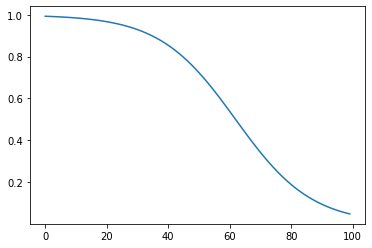

In [4]:
w = -0.4   #@param {type: "slider", min: -2, max: 2, step:0.1}
b = 1    #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(Y)
plt.show()

In [5]:
  type(Y)

numpy.ndarray

### 2D

$ S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1.x_1+w_2.x_2+b)}} $

In [6]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 2, 0.1, 0.1, 1)

0.7858349830425586

In [8]:
from mpl_toolkits import mplot3d

In [9]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [10]:
w1 = -2
w2 = 0.5
b = 0

Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [11]:
import matplotlib.colors

In [12]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

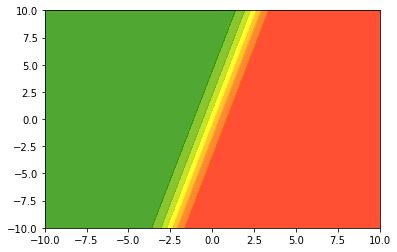

In [13]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.8)
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30,270)

## Compute Loss for a Given Dataset

In [15]:
w = 0.75
b = 0.5

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w, b)

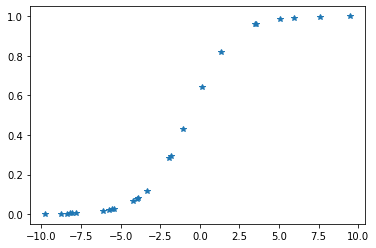

In [16]:
plt.plot(X, Y, '*')
plt.show()

In [17]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

In [18]:
WW.shape

(101, 101)

In [19]:
WW

array([[0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ],
       [0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ],
       [0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ],
       ...,
       [0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ],
       [0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ],
       [0.  , 0.02, 0.04, ..., 1.96, 1.98, 2.  ]])

In [20]:
BB

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       [-0.96, -0.96, -0.96, ..., -0.96, -0.96, -0.96],
       ...,
       [ 0.96,  0.96,  0.96, ...,  0.96,  0.96,  0.96],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]])

In [21]:
def Loss_function(X, Y, w_estimate, b_estimate):
  loss = 0
  for x, y in zip(X,Y):
    loss += (y - sigmoid(x, w_estimate, b_estimate))**2
  return loss

In [22]:
Loss = np.zeros(WW.shape)

In [23]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = Loss_function(X, Y, WW[i, j], BB[i, j])

In [24]:
Loss.shape

(101, 101)

In [25]:
ij = np.argmin(Loss)
print(ij)

7714


In [26]:
i = int(np.floor(ij/(WW.shape[1])))
j = int(ij - (i * WW.shape[0]))

mloss = Loss[i, j]

In [27]:
print(mloss)

7.431926089185961e-05


In [28]:
w_pred = WW[i,j]
b_pred = BB[i,j]

print(w_pred, b_pred)

0.76 0.52


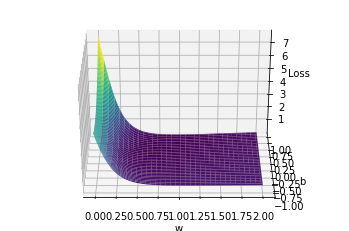

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30,270)

## Sigmoid Neuron

In [175]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self, X):
    return np.dot(X, self.w.T) + self.b
  
  def sigmoid(self, X):
    return 1.0 / (1.0 + np.exp(-X))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)

  def fit(self, X, Y, epochs = 1, learning_rate = 1, intialize = True, display_loss=False):
    
    #intialize
    if intialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    if display_loss:
      loss={}

    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred,Y)
      
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

### Fit for a small dataset

In [36]:
X = np.asarray([[2.5, 2.5], [4, -1], [1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1, 1, 1, 0,0, 0]

In [32]:
sn = SigmoidNeuron()

In [33]:
print(sn.w, sn.b)

None None


In [37]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 10)
  X2 = np.linspace(-10, 10, 10)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([ X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap = my_cmap, alpha = 0.6)
  ax.scatter(X[:,0], X[:,1], c=Y, cmap=my_cmap)
  plt.plot()

[[-0.52118761 -0.82813947]] [-0.00845068]
[[-0.25110284 -0.87906087]] [-0.00629519]
[[-0.00349149 -0.89677669]] [0.01026356]
[[ 0.15325903 -0.8530094 ]] [0.02704533]
[[ 0.28865819 -0.76287436]] [0.04489647]
[[ 0.43433395 -0.62317194]] [0.06258794]
[[ 0.59467189 -0.43474698]] [0.06877359]
[[ 0.72919041 -0.27293096]] [0.04810971]
[[ 0.79548396 -0.26425967]] [0.01522692]
[[ 0.84593475 -0.28251913]] [-0.01690394]
[[ 0.89242825 -0.29720888]] [-0.04734903]
[[ 0.93510373 -0.31087001]] [-0.07625733]
[[ 0.97464035 -0.32355149]] [-0.10370938]
[[ 1.01150128 -0.33539472]] [-0.12979117]
[[ 1.0460417  -0.34650582]] [-0.15458748]
[[ 1.07854201 -0.3569699 ]] [-0.17818058]
[[ 1.10922953 -0.36685676]] [-0.20064913]
[[ 1.13829244 -0.37622474]] [-0.22206763]
[[ 1.1658892  -0.38512334]] [-0.24250605]
[[ 1.19215509 -0.39359508]] [-0.26202974]


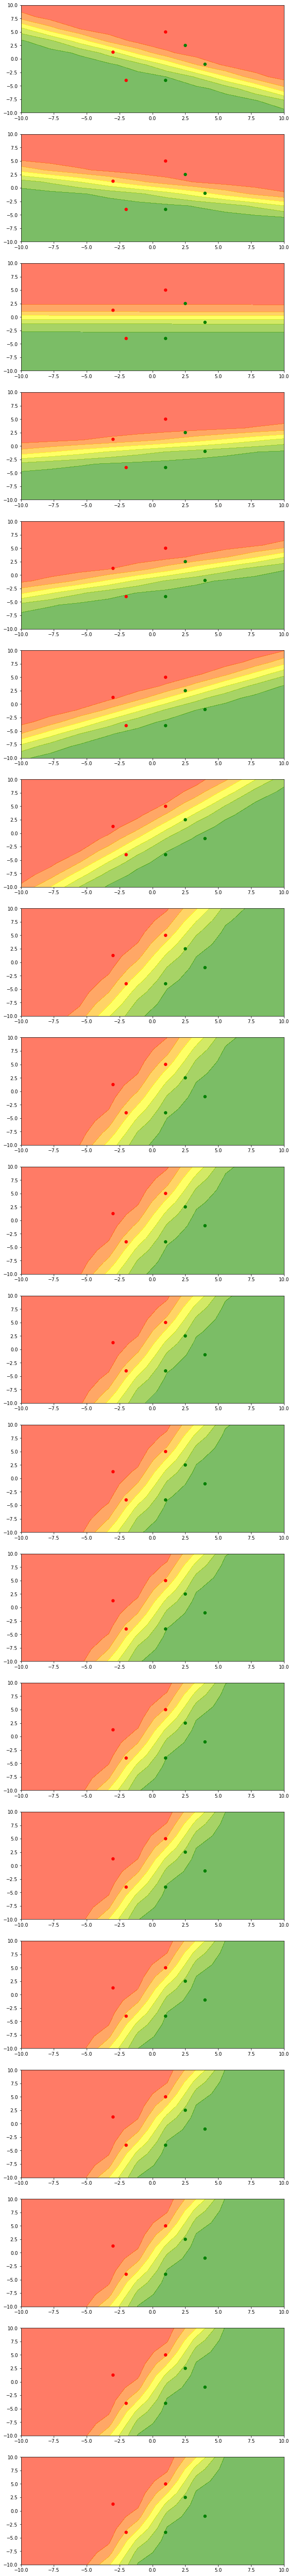

In [42]:
 sn.fit(X, Y, 1, 0.25, True)
 N=20
 plt.figure(figsize=(10,N*5))
 for i in range(N):
   print(sn.w, sn.b)
   ax = plt.subplot(N, 1, i+1)
   plot_sn(X, Y, sn, ax)
   sn.fit(X, Y, 1, 0.25, False)

### Load Dataset

In [49]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [50]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Hello World')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1Uz1_JaMVizhrPaIFfWlsofAxoAVt1eln


In [51]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned (1).csv, id 1o3CTF2GRMKcrN99_FvE_o-N4k80UtatV


In [ ]:
file_id = '1o3CTF2GRMKcrN99_FvE_o-N4k80UtatV'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [53]:
downloaded.GetContentFile("mobile_cleaned_local.csv")

In [54]:
import pandas as pd

In [59]:
!rm mobile_cleaned_local.csv

In [57]:
df = pd.read_csv('mobile_cleaned_local.csv')

In [58]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [60]:
!wget https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV

--2020-12-31 05:17:38--  https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV
Resolving drive.google.com (drive.google.com)... 173.194.214.139, 173.194.214.138, 173.194.214.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.139|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV/view?usp=drive_open [following]
--2020-12-31 05:17:38--  https://drive.google.com/file/d/1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV’

open?id=1rtwC_k4WA8     [ <=>                ]  69.46K  --.-KB/s    in 0.001s  

2020-12-31 05:17:38 (52.2 MB/s) - ‘open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV’ saved [71122]



In [61]:
!ls

 adc.json  'open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV'	 sample_data


In [65]:
link = 'https://drive.google.com/open?id=1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV'
id = '1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV'

In [66]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mobile_cleaned.csv')  


In [67]:
data = pd.read_csv('mobile_cleaned.csv')

In [68]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [70]:
X = data.drop('Rating', axis=1)

In [71]:
data.shape

(341, 88)

In [74]:
Y = data['Rating'].values

In [75]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [76]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [84]:
threshold = 4.2
data['class'] = (data['Rating']>=threshold).astype(np.int)

In [85]:
data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [86]:
Y_binarized = data['class'].values

#### Standardization

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
R = np.random.random([100,1])

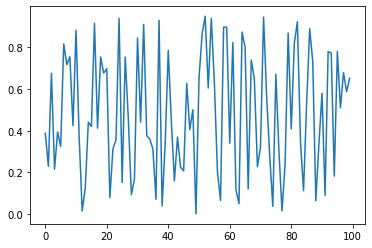

In [91]:
plt.plot(R)

In [92]:
np.mean(R)

0.4879155172040003

In [93]:
np.std(R)

0.2906204346239898

In [94]:
sc = StandardScaler()

In [95]:
sc.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
RT = sc.transform(R)

In [ ]:
RT

In [98]:
RT.mean()

-2.6867397195928787e-16

In [99]:
RT.std()

1.0

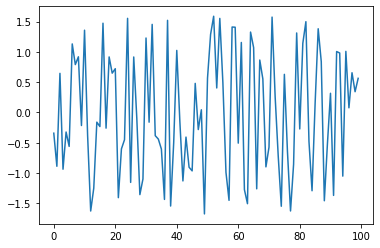

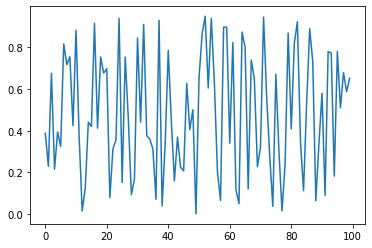

In [102]:
plt.plot(RT)
plt.show()
plt.plot(R)
plt.show()

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarized)

In [105]:
scaler = StandardScaler()

In [107]:
X_sclae_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)

In [109]:
minmax_scaler = MinMaxScaler()

In [111]:
Y_scale_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scale_test = minmax_scaler.transform(Y_test.reshape(-1,1))

In [114]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]
scaled_threshold

0.6800000000000002

In [119]:
Y_binarized_train = (Y_scale_train > scaled_threshold).astype(np.int).ravel()

In [121]:
Y_binarized_test = (Y_scale_test > scaled_threshold).astype(np.int).ravel()

### Train Model

In [176]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


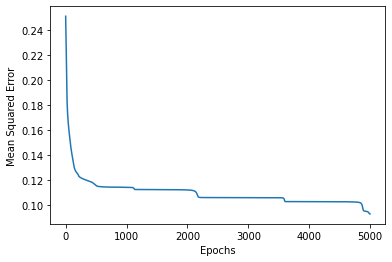

In [177]:
sn.fit(X_sclae_train, Y_scale_train, epochs=5000, learning_rate =0.01, display_loss=True)

In [167]:
Y_pred_train = sn.predict(X_sclae_train)
Y_pred_test = sn.predict(X_scale_test)

In [168]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype(np.int).ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype(np.int).ravel()

In [169]:
accuracy_train = accuracy_score(Y_binarized_train, Y_pred_binarized_train)
accuracy_test = accuracy_score(Y_binarized_test, Y_pred_binarized_test)

In [170]:
print(accuracy_train, accuracy_test)

0.7607843137254902 0.7093023255813954
